# Project: Communicate Data Findings Using Python
## by Song R.

## Investigation Overview

> In this investigation, I am interested in whether:
- Whether Lyft subscriber or normal customer make longer ride duration in minutes ('user_type', 'duration_min')
- Which rental access methods are used the most ('rental_access_method')
- Which time period of the day that bikes are rented the most ('period_day' or 'start_hour')

## Dataset Overview

> After preliminary wrangling, there are 30,362 individual rides information and 14 features. A variety of data types exist in cleaned dataset: datetime, string (object), float and category.

> For categorical data type there are:
   - 2 types of users: subscriber and customer
   - 2 types of rental access methods: Lyft application and clipper (all-in-one transit card for the San Francisco Bay Area use to unlock Bay Wheels)
   - 3 ordered time period of the day for start_time variable: morning, afternoon and night

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
bike_clean = pd.read_csv('bike_clean.csv')
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30362 entries, 0 to 30361
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_time               30362 non-null  object 
 1   end_time                 30362 non-null  object 
 2   start_station_name       30362 non-null  object 
 3   start_station_latitude   30362 non-null  float64
 4   start_station_longitude  30362 non-null  float64
 5   end_station_name         30362 non-null  object 
 6   end_station_latitude     30362 non-null  float64
 7   end_station_longitude    30362 non-null  float64
 8   bike_id                  30362 non-null  int64  
 9   user_type                30362 non-null  object 
 10  rental_access_method     30362 non-null  object 
 11  duration_min             30362 non-null  float64
 12  start_hour               30362 non-null  int64  
 13  period_day               30362 non-null  object 
dtypes: float64(5), int64(2

In [14]:
# Write graph function to reduce code repetition:
def barchart(x, xlab, ylab, title):
    sns.countplot(x)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show();

## Lyft users and ride duration in minutes

> From the visualization, customer who rent the bike longest (470.83 minutes: highest outlier value in bike_clean) is also the one that access Lyft bike rent service via application.

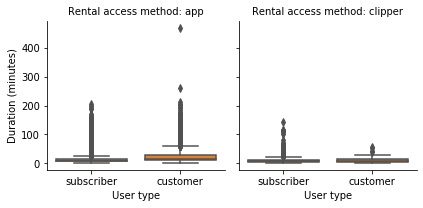

In [15]:
base_color = sns.color_palette()[1]

g = sns.FacetGrid(data = bike_clean, col = 'rental_access_method')
g.map(sns.boxplot, 'user_type', 'duration_min', color = base_color)
g.set_axis_labels('User type', 'Duration (minutes)')
g.set_titles('Rental access method: {col_name}');

## Most used rental access method

> the majority of bike users segment which is subscribers access bike service via application. More normal customers access the services via application as well. It seems that Clipper is not as popular as Lyft application.

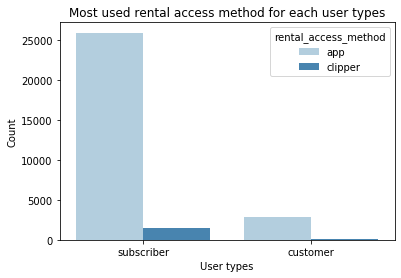

In [16]:
plt.figure(figsize = [6, 4])

sns.countplot(data = bike_clean, x = 'user_type', hue = 'rental_access_method', palette = 'Blues')
plt.xlabel('User types')
plt.ylabel('Count')
plt.title('Most used rental access method for each user types');

## Time period with the most bikes rented
> Bike users usually rented the bike in rush hour period as top 5 bike rented start time is in the late afternoon (4-5 p.m.), morning (8-9 a.m.) and evening (6 p.m.).

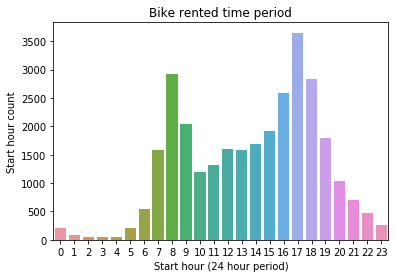

In [17]:
barchart(bike_clean.start_hour,'Start hour (24 hour period)', 'Start hour count', 'Bike rented time period')

## Bike rented periods VS ride duration
> Although the data point is an outlier, afternoon is the period that has the longest duration per ride (in minutes) and period with highest number of bike rents. This supports prior findings from previous bar chart that most bike users rented the bike in the afternoon. Therefore it is highly likely to find higher number of bike rents with long duration in that period of time.

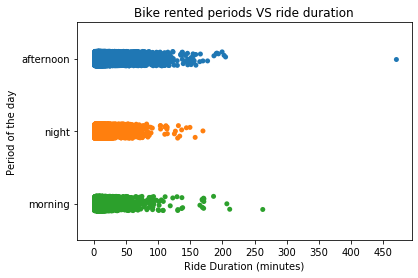

In [18]:
sns.stripplot(x = 'duration_min', y = 'period_day', data = bike_clean)
plt.xticks(np.arange(0, 500, 50))
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Period of the day')
plt.title('Bike rented periods VS ride duration');

In [ ]:
!jupyter nbconvert "Presentation (Part 2).ipynb" --to slides --post serve --template output_toggle